## Modelos Lineales

<font color=red>Definición 1.10</font> Un **modelo lineal** es aquel que contiene coeficientes lineales. Los coeficientes lineales son aquellos en donde cada término es aditivo y contiene un solo parámetro que multiplica el término.

Por ejemplo: 

- y = mx + b (fórmula de la línea, donde m es la pendiente, x es el termino y b es la interseccion con el eje y)
- y = βo * 1 + β1 * X1 + β2 * X2 + ... + βk * Xk (X son las variables, β se les llama coeficientes)
- y = x^2 es también un modelo lineal
- y βo * 1 + β1 * X1^2 (modelos polinomiales)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func_1(X,b0,b1):
    return b0 + b1 * X

In [3]:
X = np.array([0.01      , 0.01930698, 0.03727594, 0.07196857, 0.13894955,
       0.26826958, 0.51794747, 1.])

y = np.array([1.79111708, 1.81833914, 3.20477112, 5.30543043, 6.74879517,
       6.79595893, 8.85678367, 9.01523049])

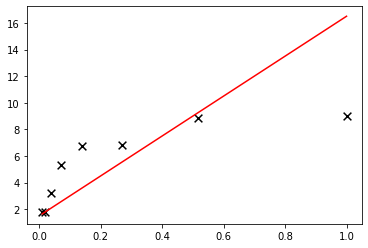

In [4]:
# la funcion func_1 genra un modelo lineal para X con los coeficientes (1.5 y 15)
y_prima = func_1(X, 1.5, 15)

plt.scatter(X,y, marker = "x", s = 60, c = "black")
plt.plot(X, y_prima, c = "red")
plt.show()

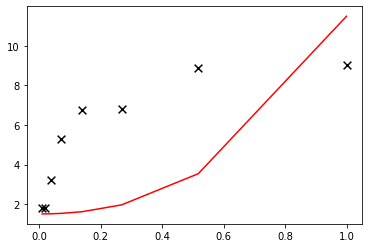

In [5]:
def func_2(X,b0,b1):
    return b0 + b1 * X**2 + b1 * X**3

# la funcion func_2 crea un modelo polinomial)
y_prima = func_2(X, 1.5, 5)

plt.scatter(X,y, marker = "x", s = 60, c = "black")
plt.plot(X, y_prima, c = "red")
plt.show()

## Modelo No-Lineal

<font color=red>Definición 1.10</font> Un **modelo no lineal** es aquel que no cumple con la definición 1.9.

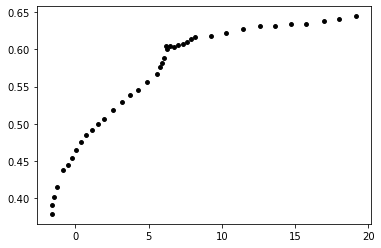

In [6]:
def func_3(x, a, b, Offset):
    return  1.0 / (1.0 + np.exp(-a * (x-b))) + Offset

X = np.array([19.1647, 18.0189, 16.9550, 15.7683, 14.7044, 13.6269, 12.6040, 11.4309, 10.2987, 9.23465, 8.18440, 7.89789, 7.62498, 7.36571, 7.01106, 6.71094, 6.46548, 6.27436, 6.16543, 6.05569, 5.91904, 5.78247, 5.53661, 4.85425, 4.29468, 3.74888, 3.16206, 2.58882, 1.93371, 1.52426, 1.14211, 0.719035, 0.377708, 0.0226971, -0.223181, -0.537231, -0.878491, -1.27484, -1.45266, -1.57583, -1.61717])
y = np.array([0.644557, 0.641059, 0.637555, 0.634059, 0.634135, 0.631825, 0.631899, 0.627209, 0.622516, 0.617818, 0.616103, 0.613736, 0.610175, 0.606613, 0.605445, 0.603676, 0.604887, 0.600127, 0.604909, 0.588207, 0.581056, 0.576292, 0.566761, 0.555472, 0.545367, 0.538842, 0.529336, 0.518635, 0.506747, 0.499018, 0.491885, 0.484754, 0.475230, 0.464514, 0.454387, 0.444861, 0.437128, 0.415076, 0.401363, 0.390034, 0.378698])

y_prima = func_3(X, 0.215, -6.67, -0.352)

plt.scatter(X,y, marker = ".", s = 60, c = "black")
#plt.plot(X, y_prima, c = "red")

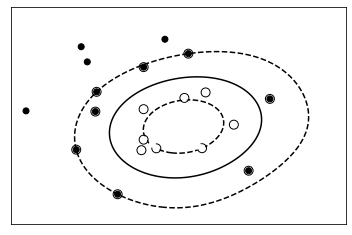

In [12]:
from sklearn import svm

def nonlinear_model(rseed=42, n_samples=30):
    radius = 40 * np.random.random(n_samples)
    far_pts = radius > 20
    radius[far_pts] *= 1.2
    radius[~far_pts] *= 1.1

    theta = np.random.random(n_samples) * np.pi * 2

    data = np.empty((n_samples, 2))
    data[:, 0] = radius * np.cos(theta)
    data[:, 1] = radius * np.sin(theta)

    labels = np.ones(n_samples)
    labels[far_pts] = -1

    return data, labels


X, y = nonlinear_model()
clf = svm.SVC(kernel='rbf', gamma=0.001, coef0=0, degree=3)
clf.fit(X, y)

plt.figure(figsize=(6, 4))
ax = plt.subplot(1, 1, 1, xticks=[], yticks=[])
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bone, zorder=2)

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=80, edgecolors="k", facecolors="none")

delta = 1
y_min, y_max = -50, 50
x_min, x_max = -50, 50
x = np.arange(x_min, x_max + delta, delta)
y = np.arange(y_min, y_max + delta, delta)
X1, X2 = np.meshgrid(x, y)
Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

ax.contour(X1, X2, Z, [-1.0, 0.0, 1.0], colors='k',
            linestyles=['dashed', 'solid', 'dashed'], zorder=1)

plt.show()